In [1]:
#importing rquired libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
#loading dataset and giving header names
boston_df = pd.read_csv("boston_dataset.csv", names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                                                      'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#checking info of dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [4]:
#droping the rows which have empty fields
boston_df = boston_df.dropna(axis = 0, how ='any') 

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    int64  
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 53.0 KB


In [6]:
#splitting the dataset into independent variables and target varibale
X = boston_df.drop(['MEDV'], axis=1)
y = boston_df.MEDV

In [7]:
#importing and performing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=34)

In [8]:
#checking the shape of train and test dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(361, 13)
(361,)
(91, 13)
(91,)


In [9]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [10]:
#fitting the standard scaler to the independent dataset
standard_scaler.fit(X_train)
standard_scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
#transforing the independent dsataset
X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [12]:
print(X_train_scaled)
print(X_test_scaled)

[[ 0.68860867 -0.52571134  1.07518399 ...  0.86406032  0.33518515
  -0.21766575]
 [-0.31294277 -0.52571134  1.59900053 ...  1.30210761  0.24101319
  -0.09587999]
 [ 3.7347664  -0.52571134  1.07518399 ...  0.86406032  0.1140915
   1.50299298]
 ...
 [ 1.14636856 -0.52571134  1.07518399 ...  0.86406032 -0.22077134
   0.43823753]
 [-0.53635275 -0.52571134  2.11867077 ...  0.3822083   0.14013346
   1.08892141]
 [ 1.11856479 -0.52571134  1.07518399 ...  0.86406032 -4.54321136
   0.95321729]]
[[-0.56931635  2.23062901 -1.18317018 ... -0.01203427 -0.33980153
   0.21902317]
 [-0.55060072  0.16337374 -0.96618021 ... -1.45759033  0.1267179
  -1.50685494]
 [-0.56218787  0.33564502 -0.75471865 ...  0.33840357  0.30519743
  -0.72394652]
 ...
 [-0.34436472  0.16337374 -0.8777257  ... -2.28988019  0.25548095
  -1.00231396]
 [-0.55683927 -0.52571134  0.22242725 ...  1.21449816  0.38753213
  -0.65957405]
 [-0.53599768 -0.09503316 -0.33870604 ... -1.32617615  0.30335608
   0.70268659]]


In [13]:
#importing keras models
from keras import models, layers
seq_model = models.Sequential()

#adding the layes to the model
seq_model.add(layers.Dense(8, activation='relu', input_shape = [X_train.shape[1]]))
seq_model.add(layers.Dense(16, activation='relu'))
seq_model.add(layers.Dense(1))

#compliling the model
seq_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [14]:
#training the model
train_model = seq_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Train on 288 samples, validate on 73 samples
Epoch 1/100
288/288 [==============================] - 0s 425us/step - loss: 638.4903 - mae: 23.7044 - val_loss: 661.0659 - val_mae: 24.3141
Epoch 2/100
288/288 [==============================] - 0s 343us/step - loss: 624.8945 - mae: 23.4381 - val_loss: 648.5620 - val_mae: 24.0770
Epoch 3/100
288/288 [==============================] - 0s 42us/step - loss: 613.1836 - mae: 23.2117 - val_loss: 636.0702 - val_mae: 23.8397
Epoch 4/100
288/288 [==============================] - 0s 39us/step - loss: 601.2833 - mae: 22.9766 - val_loss: 623.2056 - val_mae: 23.5936
Epoch 5/100
288/288 [==============================] - 0s 40us/step - loss: 588.9628 - mae: 22.7301 - val_loss: 609.9212 - val_mae: 23.3367
Epoch 6/100
288/288 [==============================] - 0s 41us/step - loss: 575.9673 - mae: 22.4740 - val_loss: 595.3397 - val_mae: 23.0524
Epoch 7/100
288/288 [==============================] - 0s 41us/step - loss: 562.0211 - mae: 22.1949 - val_loss: 5

In [15]:
#evaluating the model
seq_model.evaluate(X_test_scaled, y_test)

91/91 [==============================] - 0s 28us/step


[14.249592068431141, 2.905672788619995]

In [16]:
#predicting the result from the model
predict = X_train_scaled[:2]
prediction = seq_model.predict(predict)
print(prediction)
print(y_train[:2])

[[18.502903]
 [21.72413 ]]
483    21.8
132    23.0
Name: MEDV, dtype: float64


In [17]:
predict_all = seq_model.predict(X_test_scaled)
print(predict_all[0:10])
print(y_test[0:10])

[[24.741747]
 [45.213173]
 [22.893396]
 [26.74046 ]
 [22.801376]
 [28.025581]
 [24.98629 ]
 [18.882563]
 [26.716309]
 [17.531857]]
286    20.1
282    46.0
83     22.9
252    29.6
50     19.7
236    25.1
81     23.9
450    13.4
300    24.8
491    13.6
Name: MEDV, dtype: float64


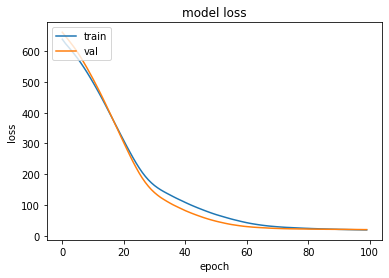

In [18]:
#plotting the model loss
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()